In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,rt _hockey: it’s gold gbr rio2016 hockey @_gbh…,0.000,0.000,Neutral
1,1,amazing! congratulations winning modernpentath...,0.825,0.625,Positive
2,2,wait. ashton eaton won decathlon gold again? yas!,0.000,0.000,Neutral
3,3,got shivers watching end chloe esposito's race...,0.000,0.000,Neutral
4,4,celebrating gold! effort! congratulations! 👍💪🏅,0.000,0.000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,75000,add bitcoins goldira investingold buyinggold j...,0.0,0.0,Neutral
1,75001,"focus sports, goldira investingold buyinggold ...",0.0,0.0,Neutral
2,75002,'we're dreading going home goldira investingol...,0.0,0.0,Neutral
3,75003,cast silver bar ira rrsp acceptable. goldira i...,0.0,0.0,Neutral
4,75004,monetary works goldira investingold buyinggold...,0.0,0.0,Neutral


In [8]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'tweet',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      0.0       1.0
2       0.0      1.0       0.0
3       0.0      1.0       0.0
4       0.0      1.0       0.0
['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      1.0       0.0
2       0.0      1.0       0.0
3       0.0      1.0       0.0
4       0.0      1.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [9]:
X_train[0].shape

(75000, 400)

In [10]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [11]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

In [12]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [13]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
12500/12500 [==============================] - 1176s 93ms/step - loss: 0.1344 - accuracy: 0.9534 - val_loss: 0.8425 - val_accuracy: 0.8658
Epoch 2/3
12500/12500 [==============================] - 1155s 92ms/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.6886 - val_accuracy: 0.8981
Epoch 3/3
12500/12500 [==============================] - 1155s 92ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.2742 - val_accuracy: 0.9517


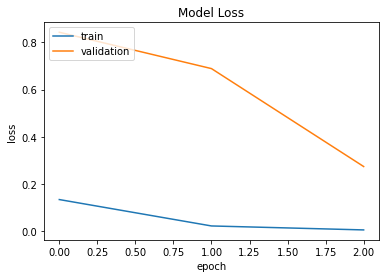

In [14]:
learner.plot('loss')

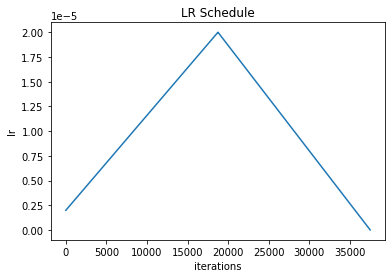

In [15]:
learner.plot('lr')

In [16]:
learner.validate()

242/242 [==============================] - 32s 116ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       757
           1       0.94      1.00      0.97      4099
           2       1.00      0.90      0.95      2880

    accuracy                           0.95      7736
   macro avg       0.94      0.93      0.93      7736
weighted avg       0.95      0.95      0.95      7736



array([[ 672,   75,   10],
       [   1, 4098,    0],
       [  96,  192, 2592]])